In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Amzon_dataset/amazon.csv'
dataset = pd.read_csv(file_path)


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


Basic EDA

In [4]:
# Display the first few rows and dataset info
print(dataset.info())
print(dataset.head())

# Check for missing values
print(dataset.isnull().sum())

# Label distribution
print(dataset['label'].value_counts())

# Review lengths
dataset['review_length'] = dataset['Text'].apply(len)
print(dataset['review_length'].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None
                                                Text  label
0  This is  the best apps acording to a bunch of ...      1
1  This is a pretty good version of the game for ...      1
2  this is a really . there are a bunch of levels...      1
3  This is a silly game and can be frustrating, b...      1
4  This is a terrific game on any pad. Hrs of fun...      1
Text     0
label    0
dtype: int64
label
1    15230
0     4766
Name: count, dtype: int64
count    19996.000000
mean       175.787257
std         58.964840
min          3.000000
25%        123.000000
50%        164.000000
75%        254.000000
max        254.000000
Name: review_length, dtype: float64


Text Cleaning and Preprocessing

In [5]:
import re

# Define a set of common stopwords manually
predefined_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these',
    'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
    'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
    'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
    'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
    'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
    'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])

# Clean the text
def clean_text_alternative(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in predefined_stopwords])  # Remove stopwords
    return text

dataset['cleaned_text'] = dataset['Text'].apply(clean_text_alternative)


Feature Extraction and Model Training
Using the Logistic Regression Model 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(dataset['cleaned_text'], dataset['label'], test_size=0.25, random_state=49)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3%}')
print(classification_report(y_test, y_pred))


Accuracy: 89.858%
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      1119
           1       0.90      0.97      0.94      3880

    accuracy                           0.90      4999
   macro avg       0.89      0.81      0.84      4999
weighted avg       0.90      0.90      0.89      4999



#Making WordCloud

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

from PIL import Image
import numpy as np

# Path to the heart image
heart_image_path = '/content/drive/MyDrive/Dataset/heart_shape.jpg'


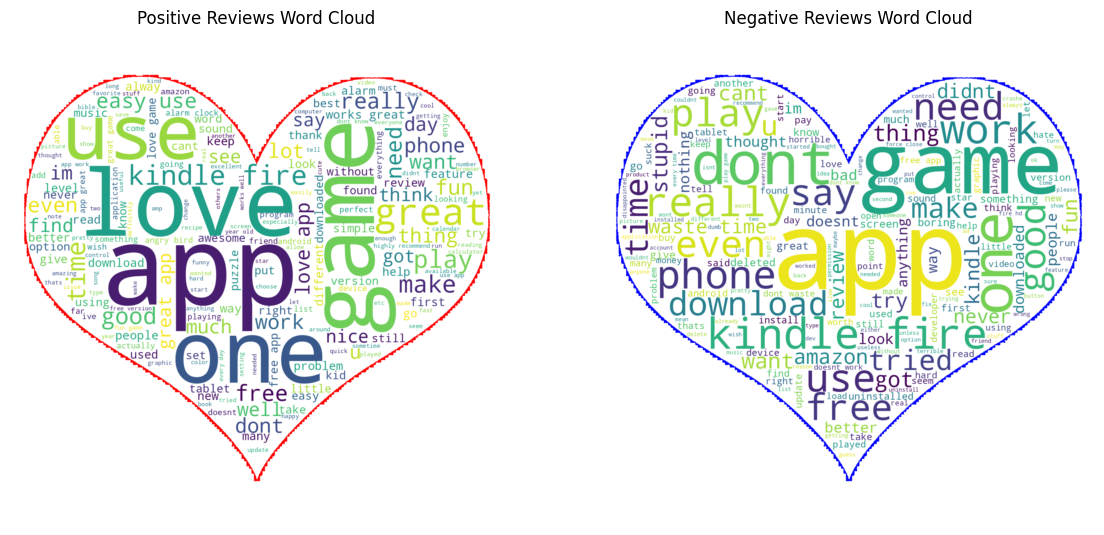

Positive common words: [('app', 8006), ('game', 4450), ('great', 3839), ('love', 3833), ('like', 3088), ('use', 2876), ('fun', 2325), ('kindle', 2163), ('get', 2154), ('one', 2115)]
Negative common words: [('app', 2650), ('game', 1387), ('get', 1051), ('dont', 1027), ('like', 818), ('would', 759), ('kindle', 726), ('time', 708), ('even', 665), ('work', 601)]


In [13]:
# Load the image
heart_mask = np.array(Image.open(heart_image_path))

# Separate positive and negative reviews
positive_reviews = dataset[dataset['label'] == 1]['cleaned_text']
negative_reviews = dataset[dataset['label'] == 0]['cleaned_text']

# Generate word clouds
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
# negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
positive_wordcloud = WordCloud(width=800, height=800, background_color='white', mask=heart_mask, contour_width=3, contour_color='red').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=800, background_color='white', mask=heart_mask, contour_width=3, contour_color='blue').generate(negative_text)


# Plot word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

# Frequency distribution for positive and negative reviews
positive_words = Counter(positive_text.split())
negative_words = Counter(negative_text.split())

# Display the most common words
positive_common_words = positive_words.most_common(10)
negative_common_words = negative_words.most_common(10)

print("Positive common words:", positive_common_words)
print("Negative common words:", negative_common_words)


In [15]:
from sklearn.metrics import hinge_loss

# Calculate hinge loss
loss = hinge_loss(y_test, y_pred)
print(f'Hinge Loss: {loss:.4f}')


Hinge Loss: 0.3253


In [16]:
from sklearn.metrics import zero_one_loss
zero_one_loss_value = zero_one_loss(y_test, y_pred)
print(f'0-1 Loss: {zero_one_loss_value:.3f}')

0-1 Loss: 0.101


In [18]:
y_test

12221    1
8117     1
6616     1
8296     1
18064    0
        ..
12528    1
8218     1
12147    1
2274     0
1525     1
Name: label, Length: 4999, dtype: int64

In [19]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

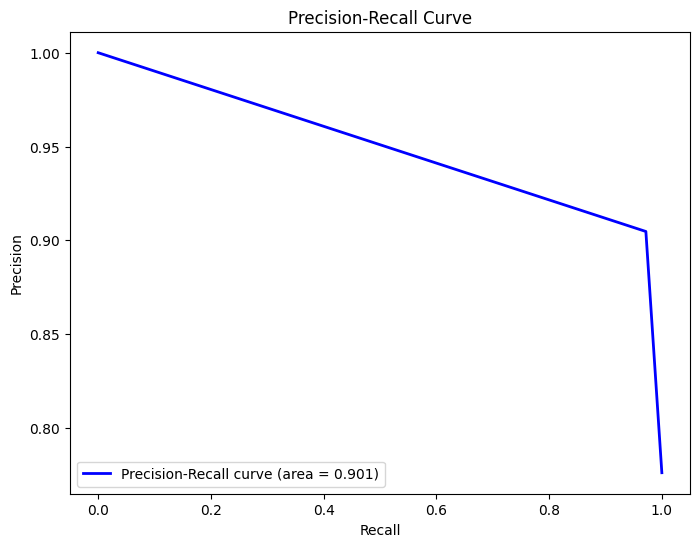

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {average_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
